#  Analyzing Current Rental Cars Market

#  Sixiao He - DATS 6103

## Background 
With the Chrismas day coming, many people will choose to rent a car to have a nice trip, it is necessary to know the situation current characteristic rental cars market, This project want to help you to know the information and feature of Rental cars.

 The data is come from rental cars market during the time of July 2020 for major US cities.
 A Dataset of 5,851 Cars with fields such as Vehicle Make, Model, Year, Daily Fare, Location Details and more.

## Some of questions i want to explore from this dataset:  
Which car makes and models are popular and in which cities?
What is the typical fare of car rental in various major cities?
Is there a Market gap or are some markets oversaturated?

## 1. Data Cleaning

In [371]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly as py
import plotly_express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import time
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)




In [372]:
# Reading the original data
df = pd.read_csv('/Users/sapdio/Desktop/dataproject_3/CarRentalDataV1.csv')

In [373]:
# show the data type 
df.dtypes

fuelType               object
rating                float64
renterTripsTaken      float64
reviewCount           float64
location.city          object
location.country       object
location.latitude     float64
location.longitude    float64
location.state         object
owner.id              float64
rate.daily            float64
vehicle.make           object
vehicle.model          object
vehicle.type           object
vehicle.year          float64
airportcity            object
dtype: object

In [374]:
# show the data for all float types 
df.describe()

rating  renterTripsTaken  reviewCount  location.latitude  location.longitude      owner.id   rate.daily  vehicle.year
count  5350.000000       5851.000000  5851.000000        5851.000000         5851.000000  5.851000e+03  5851.000000   5851.000000
mean      4.920325         33.477354    28.454794          35.582889          -99.632773  6.034830e+06    93.691506   2015.340113
std       0.182425         41.898954    35.136113           6.431408           20.391476  4.646022e+06    96.080920      4.050813
min       1.000000          0.000000     0.000000          21.272565         -158.165693  5.105000e+03    20.000000   1955.000000
25%       4.900000          5.000000     4.000000          30.453623         -117.158285  1.917451e+06    45.000000   2014.000000
50%       5.000000         18.000000    16.000000          35.554502          -95.673319  4.968749e+06    69.000000   2016.000000
75%       5.000000         46.000000    39.000000          39.996864          -81.538631  9.657496e+06   110.000000   2018.000000
max       5.000000        395.000000   321.000000          64.893610          -68.823637  1.581088e+07  1500.000000   2020.000000

In [375]:
df.shape

(5851, 16)

# 2. Pre-processing data

In [376]:
df.head(10)

fuelType  rating  renterTripsTaken  reviewCount location.city location.country  location.latitude  location.longitude location.state    owner.id  rate.daily   vehicle.make vehicle.model vehicle.type  vehicle.year  airportcity
0  ELECTRIC    5.00              13.0         12.0       Seattle               US          47.449107         -122.308841             WA  12847615.0       135.0          Tesla       Model X          suv        2019.0  Albuquerque
1  ELECTRIC    5.00               2.0          1.0       Tijeras               US          35.111060         -106.276551             NM  15621242.0       190.0          Tesla       Model X          suv        2018.0  Albuquerque
2    HYBRID    4.92              28.0         24.0   Albuquerque               US          35.127163         -106.566681             NM  10199256.0        35.0         Toyota         Prius          car        2012.0  Albuquerque
3  GASOLINE    5.00              21.0         20.0   Albuquerque               US          35.149726         -106.711425             NM   9365496.0        75.0           Ford       Mustang          car        2018.0  Albuquerque
4  GASOLINE    5.00               3.0          1.0   Albuquerque               US          35.208659         -106.601008             NM   3553565.0        47.0       Chrysler       Sebring          car        2010.0  Albuquerque
5  GASOLINE    5.00              13.0         12.0   Albuquerque               US          35.068834         -106.576111             NM   7815747.0        58.0  Mercedes-Benz      GL-Class          suv        2012.0  Albuquerque
6  GASOLINE    4.42              13.0         12.0   Albuquerque               US          35.045552         -106.633815             NM   3112016.0        42.0            GMC      Yukon XL          suv        2005.0  Albuquerque
7  GASOLINE    4.90              12.0         10.0   Albuquerque               US          35.186542         -106.686481             NM   9536762.0       117.0           Ford    Expedition          suv        2018.0  Albuquerque
8  GASOLINE    5.00               1.0          1.0   Albuquerque               US          35.061213         -106.629406             NM  14893743.0       102.0           Ford      Focus RS          car        2016.0  Albuquerque
9  GASOLINE    4.76              22.0         17.0   Albuquerque               US          35.115363         -106.556911             NM  11389136.0        49.0           Ford      EcoSport          suv        2018.0  Albuquerque

In [377]:
# change the name of some columns 
df = df.rename(columns={'renterTripsTaken':'Rental time'})
df = df.rename(columns={'rate.daily':'Price'}) 
df.head()

fuelType  rating  Rental time  reviewCount location.city location.country  location.latitude  location.longitude location.state    owner.id  Price vehicle.make vehicle.model vehicle.type  vehicle.year  airportcity
0  ELECTRIC    5.00         13.0         12.0       Seattle               US          47.449107         -122.308841             WA  12847615.0  135.0        Tesla       Model X          suv        2019.0  Albuquerque
1  ELECTRIC    5.00          2.0          1.0       Tijeras               US          35.111060         -106.276551             NM  15621242.0  190.0        Tesla       Model X          suv        2018.0  Albuquerque
2    HYBRID    4.92         28.0         24.0   Albuquerque               US          35.127163         -106.566681             NM  10199256.0   35.0       Toyota         Prius          car        2012.0  Albuquerque
3  GASOLINE    5.00         21.0         20.0   Albuquerque               US          35.149726         -106.711425             NM   9365496.0   75.0         Ford       Mustang          car        2018.0  Albuquerque
4  GASOLINE    5.00          3.0          1.0   Albuquerque               US          35.208659         -106.601008             NM   3553565.0   47.0     Chrysler       Sebring          car        2010.0  Albuquerque

In [378]:
# drop some columns which are not useful
df.drop('reviewCount', axis =1, inplace= True)
df.drop('owner.id', axis = 1, inplace = True)

In [379]:
df.head()

fuelType  rating  Rental time location.city location.country  location.latitude  location.longitude location.state  Price vehicle.make vehicle.model vehicle.type  vehicle.year  airportcity
0  ELECTRIC    5.00         13.0       Seattle               US          47.449107         -122.308841             WA  135.0        Tesla       Model X          suv        2019.0  Albuquerque
1  ELECTRIC    5.00          2.0       Tijeras               US          35.111060         -106.276551             NM  190.0        Tesla       Model X          suv        2018.0  Albuquerque
2    HYBRID    4.92         28.0   Albuquerque               US          35.127163         -106.566681             NM   35.0       Toyota         Prius          car        2012.0  Albuquerque
3  GASOLINE    5.00         21.0   Albuquerque               US          35.149726         -106.711425             NM   75.0         Ford       Mustang          car        2018.0  Albuquerque
4  GASOLINE    5.00          3.0   Albuquerque               US          35.208659         -106.601008             NM   47.0     Chrysler       Sebring          car        2010.0  Albuquerque

In [380]:
df.sort_values(by = 'Price', ascending=False).head(5)

fuelType  rating  Rental time      location.city location.country  location.latitude  location.longitude location.state   Price   vehicle.make vehicle.model vehicle.type  vehicle.year       airportcity
4235  GASOLINE     5.0          1.0              Miami               US          25.762867          -80.189340             FL  1500.0    Rolls Royce         Ghost          car        2011.0        Fort Myers
877   GASOLINE     NaN          0.0           Monument               US          39.065143         -104.833966             CO  1485.0           Ford       Mustang          car        2020.0  Colorado Springs
4242  GASOLINE     NaN          0.0  Sunny Isles Beach               US          25.952209          -80.120557             FL  1400.0  Mercedes-Benz       G-Class          suv        2015.0        Fort Myers
4237  GASOLINE     5.0          3.0  Sunny Isles Beach               US          25.952512          -80.119771             FL  1200.0   Aston Martin    V8 Vantage          car        2013.0        Fort Myers
1572       NaN     5.0          4.0        Miami Beach               US          25.792413          -80.128798             FL  1199.0    Lamborghini       Huracan          car        2019.0   Fort Lauderdale

In [381]:
df.sort_values(by = 'Price', ascending=True).head(5)

fuelType  rating  Rental time   location.city location.country  location.latitude  location.longitude location.state  Price vehicle.make vehicle.model vehicle.type  vehicle.year     airportcity
5093  GASOLINE    5.00          6.0  Salt Lake City               US          40.806653         -111.947767             UT   20.0     Chrysler       Sebring          car        2006.0  Salt Lake City
2836  GASOLINE    4.78         28.0     Minneapolis               US          44.912214          -93.211376             MN   20.0       Toyota         Yaris          car        2012.0     Minneapolis
4656  GASOLINE    5.00         12.0          Renton               US          47.452929         -122.197827             WA   20.0    Chevrolet          Aveo          car        2010.0         Seattle
5332  GASOLINE    4.94         41.0          Irvine               US          33.646327         -117.749031             CA   20.0       Nissan         Versa          car        2017.0       Santa Ana
3910  GASOLINE    5.00          2.0            Mesa               US          33.463605         -111.754630             AZ   20.0       Nissan         Versa          car        2016.0         Phoenix

In [382]:
df.loc[df['location.state']== 'VA']

fuelType  rating  Rental time location.city location.country  location.latitude  location.longitude location.state  Price   vehicle.make      vehicle.model vehicle.type  vehicle.year airportcity
959   GASOLINE    4.81        114.0     Arlington               US          38.864034          -77.063553             VA  118.0       Maserati             Ghibli          car        2014.0  Washington
960   GASOLINE    4.60         67.0     Arlington               US          38.865753          -77.063567             VA   55.0  Mercedes-Benz           GL-Class          suv        2011.0  Washington
961   GASOLINE    4.65        138.0     Arlington               US          38.864043          -77.064212             VA   49.0           Audi                 A4          car        2015.0  Washington
963   GASOLINE    4.78         29.0     Arlington               US          38.865244          -77.063796             VA  116.0        Porsche            Cayenne          suv        2011.0  Washington
964   GASOLINE    4.37         52.0     Arlington               US          38.864061          -77.063268             VA   49.0           Audi                 A4          car        2013.0  Washington
...        ...     ...          ...           ...              ...                ...                 ...            ...    ...            ...                ...          ...           ...         ...
4163  ELECTRIC    4.93         19.0       Roanoke               US          37.271883          -79.941661             VA  174.0          Tesla            Model 3          car        2018.0     Roanoke
4164  GASOLINE    4.90         30.0       Roanoke               US          37.271403          -79.941326             VA   94.0         HUMMER                 H3          suv        2007.0     Roanoke
4165  GASOLINE    5.00          8.0       Roanoke               US          37.272740          -79.942503             VA   69.0           MINI  Cooper Countryman          car        2012.0     Roanoke
4166  GASOLINE    5.00         18.0       Roanoke               US          37.349310          -79.895554             VA   56.0         Subaru       XV Crosstrek          suv        2014.0     Roanoke
4167  GASOLINE    5.00          1.0       Roanoke               US          37.199956          -80.022282             VA  248.0        Porsche            Cayenne          suv        2013.0     Roanoke

[145 rows x 14 columns]

## 3. Plot and analyse the characteristic of rentals cars market

In [383]:
# show the all types of fuel for cars 
df['fuelType'].unique()

array(['ELECTRIC', 'HYBRID', 'GASOLINE', nan, 'DIESEL'], dtype=object)

In [384]:
# show the proportion of different fueltype rented cars
df_fuelType = pd.DataFrame(df.fuelType.value_counts()).reset_index()
df_fuelType.rename(columns = {'index':'fuelType', 'fuelType':'count'}, inplace=True)

fig = px.pie(df_fuelType, values = 'count', names='fuelType', title = 'Fuel Type of Rental Cars')
fig.show()

### Gasoline car are in majority of whole Rental cars market, some other fuel type of rental cars still in smll proportion, however, electric have the growing tend in Cars rental market. 

In [385]:
# show the vehicle type distribution of rental cars 
df_vehicleType = pd.DataFrame(df['vehicle.type'].value_counts()).reset_index()
df_vehicleType.rename(columns = {'index':'vehicle.type', 'vehicle.type':'count'}, inplace=True)

fig = px.pie(df_vehicleType, values = 'count', names='vehicle.type', title = 'Vehicle Type of Rental Cars')
fig.show()

### For the type of Rental car, cars and suv are stand firmly in the market due to that the uses for rent a car are mostly trip or work.

In [386]:
# show the rating distribution about the rental cars 
print("Rating Statistics:")
print(df['rating'].describe())

fig = px.histogram(df, x = 'rating', title = 'Histogram of Rental Car Rating')
fig.show()

Rating Statistics:
count    5350.000000
mean        4.920325
std         0.182425
min         1.000000
25%         4.900000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64


In [387]:
# show the renteal trips distribution
print("Renter Trips Taken Statistics:")
print(df['Rental time'].describe())

fig = px.histogram(df, x = 'Rental time', title = 'Histogram of Rental time(hours)')
fig.show()

Renter Trips Taken Statistics:
count    5851.000000
mean       33.477354
std        41.898954
min         0.000000
25%         5.000000
50%        18.000000
75%        46.000000
max       395.000000
Name: Rental time, dtype: float64


In [388]:
# show the vehicle year distribution 
print('Vehicle Year Statistics:')
print(df['vehicle.year'].describe())

fig = px.histogram(df, x = 'vehicle.year', title='Year of Vehicle')
fig.show()

Vehicle Year Statistics:
count    5851.000000
mean     2015.340113
std         4.050813
min      1955.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2020.000000
Name: vehicle.year, dtype: float64


In [389]:
# Show the daily rate of price for rental cars 
print('Daily price of Car Rental Statistics:')
print(df['Price'].describe())

fig = px.histogram(df, x = 'Price', title='Daily price of Car Rental')
fig.show()

Daily price of Car Rental Statistics:
count    5851.000000
mean       93.691506
std        96.080920
min        20.000000
25%        45.000000
50%        69.000000
75%       110.000000
max      1500.000000
Name: Price, dtype: float64


In [390]:
# show the rental cars distribution based on cities
# also, the latitude and longitude for rental cars are shown 
# we divided the quantity of rental cars for 5 class 
# they are seperately top 2,3-10, 11-50, 101-1000 which can help
# me to see the rental cars distribution based on cities
def get_average_lat_long(city, ltype):
    choices = df[df['location.city'] == city]
    lat = choices['location.latitude'].mean()
    long = choices['location.longitude'].mean()
    if ltype == 0:
        return lat
    else:
        return long

df_location = pd.DataFrame(df['location.city'].value_counts()).reset_index()
df_location.rename(columns = {'index':'city', 'location.city':'count'}, inplace=True)
df_location['latitude'] = df_location['city'].apply(lambda x: get_average_lat_long(x, 0))
df_location['longitude'] = df_location['city'].apply(lambda x: get_average_lat_long(x, 1))
df_location['text'] = df_location['city'] + '<br>Car Rentals ' + (df_location['count']).astype(str)

limits = [(0,2),(3,10),(11,50),(51,100),(101,1000)]
colors = ["blue","crimson","lightseagreen","orange","grey"]
cities = []
scale = 0.5

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_location[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['count']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Car Rentals by City distribution',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(201, 221, 236)',
        )
    )

fig.show()

In [391]:
# show the rentals car based on states
df_state = pd.DataFrame(df['location.state'].value_counts()).reset_index()
df_state.rename(columns = {'index':'state', 'location.state':'count'}, inplace=True)

fig = go.Figure(data=go.Choropleth(
    locations=df_state['state'], # Spatial coordinates
    z = df_state['count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Number of Cars Rented",
))

fig.update_layout(
    title_text = 'Car Rentals by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

Text(0.5, 0, 'Type of vehicles')

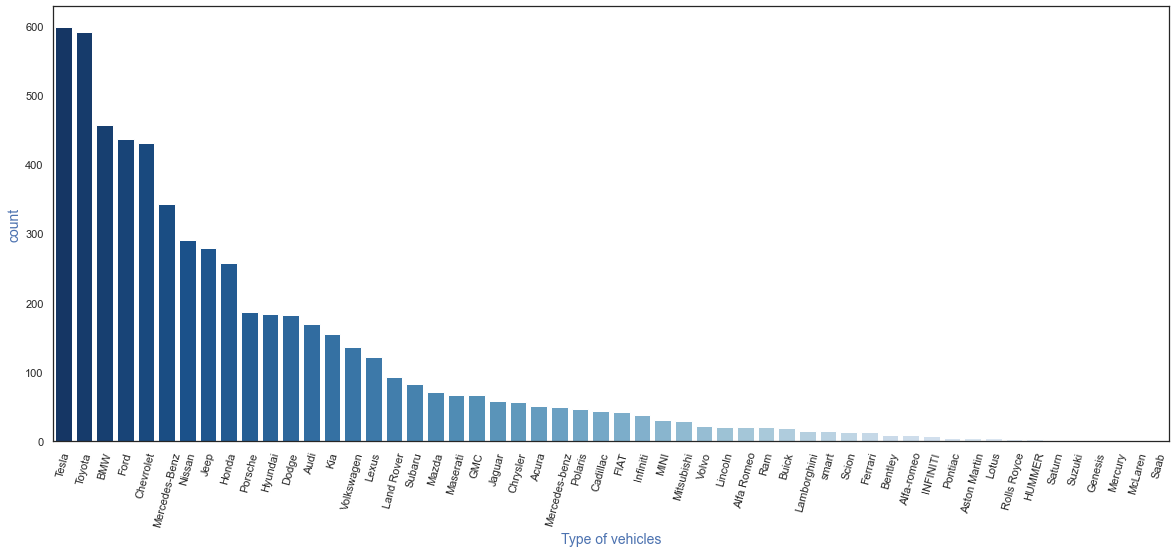

In [392]:
size = (20,8)
fig, ax = pyplot.subplots(figsize=size)
plt.xticks(rotation=75)

sns.countplot(x='vehicle.make', data=dfall,
              order = df['vehicle.make'].value_counts().index,
              palette="Blues_r"
           )
ax.set_ylabel('count', fontsize=14, color='b')
ax.set_xlabel('Type of vehicles', fontsize=14, color='b')

In [393]:
# show the different vehicle models cars in total vehicle statistics
df_make_model = df.groupby(['vehicle.make', 'vehicle.model']).size().reset_index()
df_make_model.rename(columns = {0:'count'}, inplace=True)
df_make_model.replace('Mercedes-benz', 'Mercedes-Benz', inplace=True)
df_make_model['make_count'] = df_make_model['vehicle.make'].apply(lambda x : df_make_model[df_make_model['vehicle.make'] == x]['count'].sum())
df_make_model.sort_values(by = 'make_count', ascending=False, inplace=True)

fig = px.bar(df_make_model[df_make_model['make_count'] >45], x = 'vehicle.make', y='count', color = 'vehicle.model', title=' Details Model of Top 25 Most Rented Cars')
fig.update_layout(showlegend = False)
fig.show()

/Users/sapdio/opt/anaconda3/envs/new/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



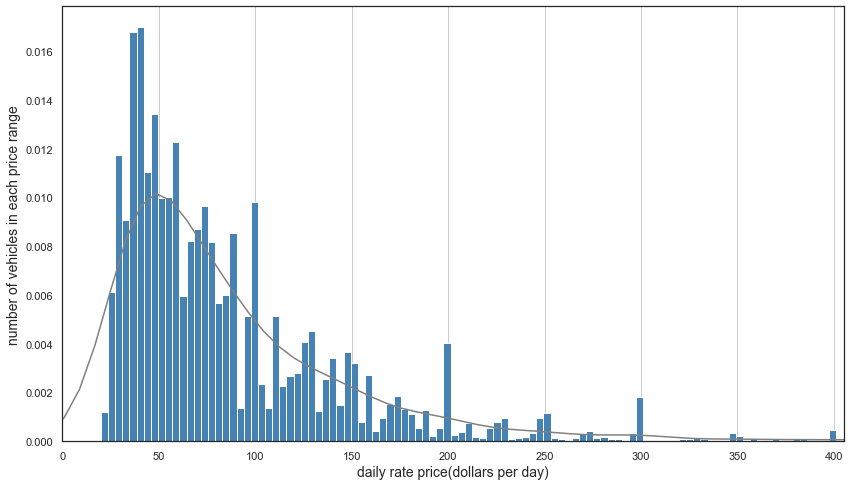

In [394]:
# show the daily rete price distribution 
size = (14, 8)
x = df['Price']
fig, ax = pyplot.subplots(figsize=size)
sns.distplot(x, bins=400, 
             kde=True, 
             color='gray', 
             hist_kws={"alpha":None, "color":'steelblue'}
            )
plt.xlim(0, 405)# limit the number of xlabel 
ax.set_ylabel('number of vehicles in each price range', fontsize=14)
ax.set_xlabel('daily rate price(dollars per day)', fontsize=14)
ax.xaxis.grid(True)

### Majority of Car rental fare is between 35–60 Dollar per day range 

Text(0.5, 0, 'daily rate (dollars per day)')

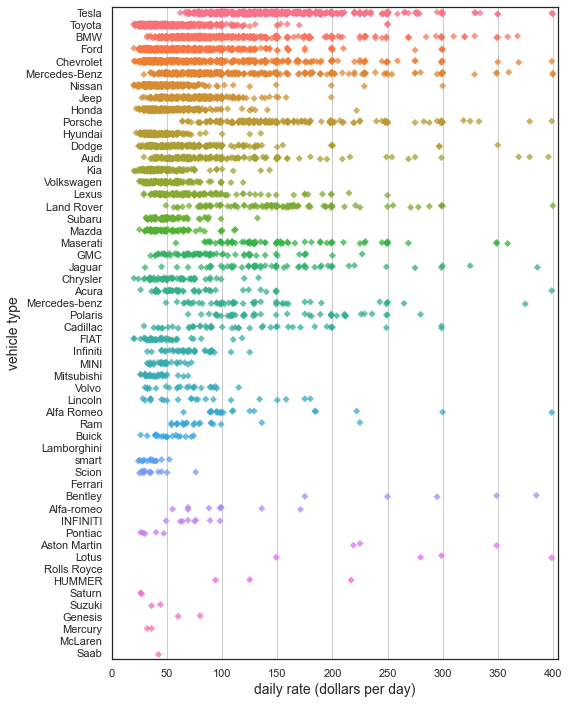

In [395]:
# show the different vehicle type daily price range 
size = (8, 12)
fig, ax = pyplot.subplots(figsize=size)
sns.stripplot(x="Price", y="vehicle.make",
                
                data=df,
                palette="husl", 
                size=5, 
                marker="D",
                edgecolor="gray", 
                alpha=.75,
                order = df['vehicle.make'].value_counts().index
                )
ax.xaxis.grid(True)
ax.yaxis.grid(False)
plt.xlim(0, 405)
ax.set_ylabel('vehicle type', fontsize=14)
ax.set_xlabel('daily rate (dollars per day)', fontsize=14)

### From the picture, it is obvious to see that Tesla is the most rented car. Closely following Tesla is Toyota, BMW, Ford and Chevrolet. This figure shows the type of cars against daily rental values and is arranged from top to bottom in the order their counts/numbers. Each dot below represents a car from the dataset!

### Also, Rarest Cars are: McLaren, Saab, Suzuki, Mercury and Genesis

Text(0.5, 0, 'daily rate (dollars per day)')

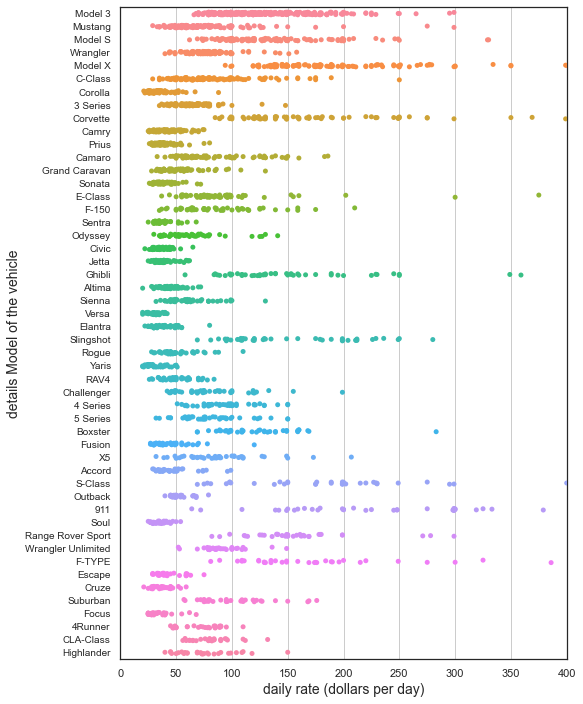

In [396]:
# show the details model vehicle daily price range 
size = (8, 12)
fig, ax = pyplot.subplots(figsize=size)
sns.stripplot(x="rate.daily", y="vehicle.model", data=dfall,
                order = dfall['vehicle.model'].value_counts().iloc[:50].index
             )
ax.xaxis.grid(True)
ax.yaxis.grid(False)
plt.xlim(0, 400) # limit the number of xlabel 
plt.yticks(fontsize=10)
ax.set_ylabel('details Model of the vehicle', fontsize=14)
ax.set_xlabel('daily rate (dollars per day)', fontsize=14)

### Most popular Car models are: Model 3, Mustang, Model S, Wrangler and Model X 
### This figure shows only top 50 models are shown below as number of models were too many.

Text(0, 0.5, 'daily rate (dollars per day)')

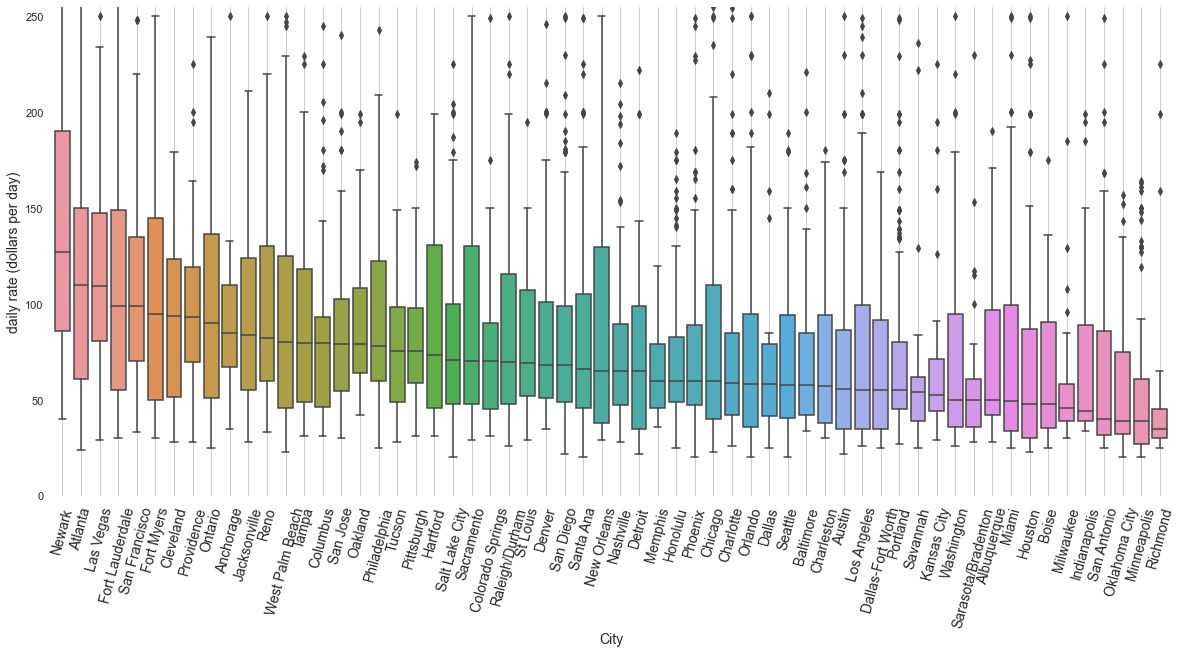

In [397]:
# show several airpors rental cars price range 
Size = (20, 9)
fig, ax = pyplot.subplots(figsize=Size)
sns.set(style="white")
# Draw a categorical scatterplot to show each observation
sns.boxplot(y="Price", x="airportcity",  
              data=df.groupby('airportcity').filter(lambda x: len(x) >= 20),
              order = df.groupby('airportcity').filter(lambda x: len(x) >= 20)\
                     .groupby(['airportcity']).median()\
                    .sort_values('Price', ascending = False)\
                     .index)

ax.xaxis.grid(True)
ax.yaxis.grid(False)
sns.despine(left=True, bottom=True)

plt.ylim(0, 255)
plt.xticks(rotation=75, fontsize=14)
ax.set_xlabel('City', fontsize=14)
ax.set_ylabel('daily rate (dollars per day)', fontsize=14)


### Most expensive cities for car rentals: Newark, Atlanta, Las Vegas, Fort Lauderdale and San Francisco
### I only included cities which had at least 20 cars operational in the city for a fairer comparison. The cities are ranked from highest median car rental value to lowest. Median is a better metric here than a simple average.

## 4. Conlcusion

### Above now we have already know the situation about Cars rental market which will help to make a nice decision in next rent about Cars. 



### This project is only a small part of rental cars, but it still can see some special feature of reantal cars. 

### Like Tesla is still one of the most popular cars type during the america, their car types model 3, model s, model x are still favourite cars for large number of people, this project analyzation are clearly show the price, location, vehicle type and several aspects about rental cars. 
### Hopefully you have already know which cars are most popular in US and what are their typical rental fares in various cities?  I gathered lot of insights through this exercise, but for the sake of time I have already presenting some of the most interesting ones for your consumption.
### if you want to see more, please follow the pages in Github https://spadio9587.github.io/data-project-2/
ZENODO:https://zenodo.org/record/4266888#.X6rvnpNKhhE

## 5. Learning Process
### For this project ,  I have apply some techniques which I learnd in the data mining class, from the pre processing  data and analyzing the data to get relationship among price, vehicle type, location and so on.  This is my first time to get connect with data class, I have already gather more knowledge for several aspects. Not only this project, but also things I learned from data class will apply to my job in the future. 
### Thank you so much! 